# BDP - Assignment 4 - BhoiteShivani

In [1]:
import pandas as pd
import requests
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import us

#Year 1
url = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2016-01-01&endtime=2017-01-01&minmagnitude=4"


Year1 = requests.get(url).text
f = open("Year1.csv", "w")
f.write(Year1)
f.close()

#Year 2
url = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2017-01-01&endtime=2018-01-01&minmagnitude=4"


Year2 = requests.get(url).text
f = open("Year2.csv", "w")
f.write(Year2)
f.close()


#Year 3
url = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2018-01-01&endtime=2019-01-01&minmagnitude=4"

Year3 = requests.get(url).text
f = open("Year3.csv", "w")
f.write(Year3)
f.close()


#Year 4
url = "https://earthquake.usgs.gov/fdsnws/event/1/query?format=csv&starttime=2019-01-01&endtime=2019-10-02&minmagnitude=4"

Year4 = requests.get(url).text
f = open("Year4.csv", "w")
f.write(Year4)
f.close()

In [65]:
df_year1 = pd.read_csv('Year1.csv')
df_year2 = pd.read_csv('Year2.csv')
df_year3 = pd.read_csv('Year3.csv')
df_year4 = pd.read_csv('Year4.csv')


frames=[df_year1,df_year2,df_year3,df_year4]
all_data_df=pd.concat(frames,sort=False)

all_data_df.to_csv('All_Data.csv')

#All the data is combined and Stored into All_data.csv

In [66]:
#Reading from the csv which contains the entire data
final_df = pd.read_csv('All_Data.csv')

final_df = final_df.loc[:, ~final_df.columns.str.contains('^Unnamed')]

final_df.count()

time               53019
latitude           53019
longitude          53019
depth              53019
mag                53019
magType            53019
nst                  399
gap                52171
dmin               52126
rms                53019
net                53019
id                 53019
updated            53019
place              53019
type               53019
horizontalError    52577
depthError         53019
magError           51242
magNst             51445
status             53019
locationSource     53019
magSource          53019
dtype: int64

In [4]:
final_df=final_df[final_df['type']=='earthquake']
final_df.count()

time               52949
latitude           52949
longitude          52949
depth              52949
mag                52949
magType            52949
nst                  337
gap                52104
dmin               52059
rms                52949
net                52949
id                 52949
updated            52949
place              52949
type               52949
horizontalError    52507
depthError         52949
magError           51234
magNst             51375
status             52949
locationSource     52949
magSource          52949
dtype: int64

# 1) Use describe to get the basic statistics of all the columns (5 points)

In [5]:
final_df.describe()


,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,52949.000000,52949.000000,52949.000000,52949.000000,337.000000,52104.000000,52059.000000,52949.000000,52507.000000,52949.000000,51234.000000,51375.000000
mean,1.885528,34.094598,94.248615,4.526346,47.314540,110.728964,3.713244,0.827361,8.755007,5.449799,0.121070,42.229547
std,28.964056,124.270621,147.877783,0.397914,35.342401,51.025045,4.737601,0.262184,3.650913,4.190688,0.065074,61.172488
min,-79.983700,-179.998600,-0.930000,4.000000,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-19.517300,-74.366100,10.000000,4.300000,23.000000,73.000000,1.173000,0.650000,6.300000,1.900000,0.073000,12.000000
50%,-3.359300,94.023900,33.940000,4.500000,37.000000,106.000000,2.382000,0.810000,8.200000,4.800000,0.112000,21.000000
75%,24.318600,141.910000,106.190000,4.700000,64.000000,142.250000,4.399000,0.990000,10.800000,7.900000,0.153000,45.000000
max,86.996400,179.999300,690.950000,8.200000,289.000000,346.000000,62.626000,2.530000,51.700000,69.300000,1.000000,854.000000


# 2) Get the top 10 earthquakes by magnitude (5 points)

In [6]:
largest_mag_df = final_df.nlargest(10, 'mag')

largest_mag_df[['place','mag']]

,place,mag
19922,"101km SSW of Tres Picos, Mexico",8.2
34757,"286km NNE of Ndoi Island, Fiji",8.2
47643,"78km SE of Lagunas, Peru",8.0
789,"54km E of Taron, Papua New Guinea",7.9
27708,"35km WNW of Panguna, Papua New Guinea",7.9
33669,"102km ESE of Suva, Fiji",7.9
42324,"280km SE of Kodiak, Alaska",7.9
1335,"69km WSW of Kirakira, Solomon Islands",7.8
2674,"54km NNE of Amberley, New Zealand",7.8
11284,"27km SSE of Muisne, Ecuador",7.8


# 3) Handle all Null/empty data by filling it with zeros (10 points)

In [7]:
final_df=final_df.fillna(0)
final_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-12-31T21:57:40.910Z,10.0165,126.2526,54.74,4.7,mb,0.0,94.0,3.002,0.67,...,2017-03-23T22:52:11.040Z,"19km E of San Isidro, Philippines",earthquake,9.1,7.3,0.069,64.0,reviewed,us,us
1,2016-12-31T21:43:55.590Z,-5.9993,153.7578,10.00,5.1,mb,0.0,65.0,2.397,0.73,...,2017-03-23T22:52:11.040Z,"187km SSE of Taron, Papua New Guinea",earthquake,8.1,1.8,0.062,84.0,reviewed,us,us
2,2016-12-31T21:08:02.160Z,26.0580,128.7113,8.26,4.8,mb,0.0,77.0,0.869,0.54,...,2017-03-23T22:52:11.040Z,"89km ESE of Haebaru, Japan",earthquake,5.2,4.8,0.076,54.0,reviewed,us,us
3,2016-12-31T19:58:49.130Z,-17.3728,-173.8997,92.92,4.7,mb,0.0,68.0,4.138,0.89,...,2017-03-23T22:52:11.040Z,"141km N of Neiafu, Tonga",earthquake,12.7,7.1,0.080,48.0,reviewed,us,us
4,2016-12-31T17:22:51.700Z,1.0439,126.5326,42.38,4.0,mb,0.0,197.0,0.876,0.98,...,2017-03-23T22:52:11.040Z,"97km WNW of Kota Ternate, Indonesia",earthquake,11.8,27.3,0.183,8.0,reviewed,us,us
5,2016-12-31T16:15:56.660Z,56.0498,160.5580,138.19,4.3,mb,0.0,146.0,3.230,1.46,...,2017-03-23T22:52:11.040Z,"116km E of Esso, Russia",earthquake,12.5,13.5,0.119,20.0,reviewed,us,us
6,2016-12-31T15:01:22.860Z,5.3647,94.6379,67.06,4.9,mb,0.0,135.0,2.303,1.08,...,2017-03-23T22:52:11.040Z,"78km WSW of Banda Aceh, Indonesia",earthquake,9.1,6.7,0.057,97.0,reviewed,us,us
7,2016-12-31T14:17:02.890Z,-25.0114,179.7307,513.31,4.0,mb,0.0,120.0,7.397,0.80,...,2017-03-23T22:52:11.040Z,South of the Fiji Islands,earthquake,15.8,15.9,0.143,13.0,reviewed,us,us
8,2016-12-31T13:29:43.200Z,-18.1405,-173.9993,124.52,4.3,mb,0.0,192.0,3.972,0.72,...,2017-03-23T22:52:11.040Z,"56km N of Neiafu, Tonga",earthquake,13.9,16.1,0.129,17.0,reviewed,us,us
9,2016-12-31T10:36:24.160Z,-16.6097,-173.2415,35.00,4.3,mb,0.0,140.0,3.997,0.62,...,2017-03-23T22:52:11.040Z,"91km SE of Hihifo, Tonga",earthquake,7.8,2.0,0.129,17.0,reviewed,us,us


# 4) Find the top 10 places where the strongest earthquakes occurred (15 points)​

In [8]:
newdf=final_df.nlargest(10, 'mag')
newdf['place'].str.split('of').str[-1]

19922            Tres Picos, Mexico
34757             Ndoi Island, Fiji
47643                 Lagunas, Peru
789         Taron, Papua New Guinea
27708     Panguna, Papua New Guinea
33669                    Suva, Fiji
42324                Kodiak, Alaska
1335      Kirakira, Solomon Islands
2674          Amberley, New Zealand
11284               Muisne, Ecuador
Name: place, dtype: object

# 5) Find the top 10 places where the weakest earthquakes occurred (15 points)​

In [9]:
newdf=final_df.nsmallest(10, 'mag')
newdf['place'].str.split('of').str[-1]

4                    Kota Ternate, Indonesia
7                           the Fiji Islands
48                     Khrisokhorion, Greece
193                     San Andres, Colombia
204                          La Ligua, Chile
215     San Antonio de los Cobres, Argentina
217                  El Rosario, El Salvador
232                    Puerto Quellon, Chile
240        Agrihan, Northern Mariana Islands
245                        Ndoi Island, Fiji
Name: place, dtype: object

# 6)​ On a per-year basis, use a bar chart to plot the number of earthquakes for each of the following magnitude groups ranges:​ Group 1: [4,4.5), Group 2: [4.5,5), Group 3: [5,6), Group 4: [6,7), Group 5: (7,MAX]. Pay close attention to the group ranges. (20 points) Please add labels and colors to the plot.

In [11]:
#Dividing the entire year into 4 groups
maxmag= final_df['mag'].max()
bins = 4,4.5,5,6,7,maxmag #for naming the xticks


df_year1_group1 = df_year1[(df_year1['mag']>=4) & (df_year1['mag']<4.5)]
df_year1_group2 = df_year1[(df_year1['mag']>=4.5) & (df_year1['mag']<5)]
df_year1_group3 = df_year1[(df_year1['mag']>=5) & (df_year1['mag']<6)]
df_year1_group4 = df_year1[(df_year1['mag']>=6) & (df_year1['mag']<7)]
df_year1_group5 = df_year1[(df_year1['mag']>7) & (df_year1['mag']<=maxmag)]


df_year2_group1 = df_year2[(df_year2['mag']>=4) & (df_year2['mag']<4.5)]
df_year2_group2 = df_year2[(df_year2['mag']>=4.5) & (df_year2['mag']<5)]
df_year2_group3 = df_year2[(df_year2['mag']>=5) & (df_year2['mag']<6)]
df_year2_group4 = df_year2[(df_year2['mag']>=6) & (df_year2['mag']<7)]
df_year2_group5 = df_year2[(df_year2['mag']>7) & (df_year2['mag']<=maxmag)]


df_year3_group1 = df_year3[(df_year3['mag']>=4) & (df_year3['mag']<4.5)]
df_year3_group2 = df_year3[(df_year3['mag']>=4.5) & (df_year3['mag']<5)]
df_year3_group3 = df_year3[(df_year3['mag']>=5) & (df_year3['mag']<6)]
df_year3_group4 = df_year3[(df_year3['mag']>=6) & (df_year3['mag']<7)]
df_year3_group5 = df_year3[(df_year3['mag']>7) & (df_year3['mag']<=maxmag)]


df_year4_group1 = df_year4[(df_year4['mag']>=4) & (df_year4['mag']<4.5)]
df_year4_group2 = df_year4[(df_year4['mag']>=4.5) & (df_year4['mag']<5)]
df_year4_group3 = df_year4[(df_year4['mag']>=5) & (df_year4['mag']<6)]
df_year4_group4 = df_year4[(df_year4['mag']>=6) & (df_year4['mag']<7)]
df_year4_group5 = df_year4[(df_year4['mag']>7) & (df_year4['mag']<=maxmag)]



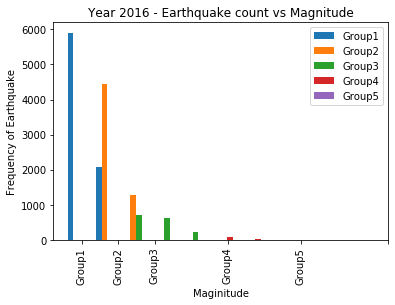

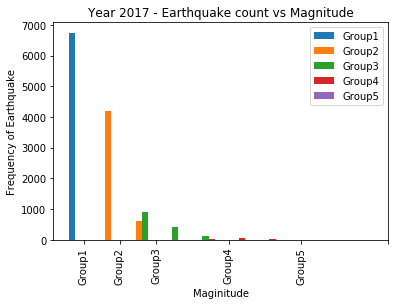

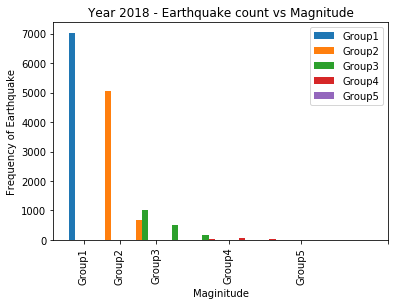

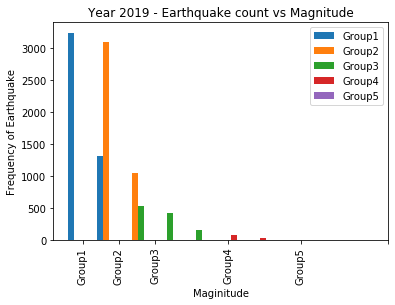

In [13]:

#Year 2016
plt.hist((df_year1_group1['mag'],df_year1_group2['mag'],df_year1_group3['mag'],df_year1_group4['mag'],df_year1_group5['mag']), 
         bins=None, histtype='bar',align='left', rwidth=10)
plt.xticks(bins,('Group1','Group2','Group3','Group4','Group5'),rotation=90)
plt.xlabel('Maginitude')
plt.ylabel('Frequency of Earthquake')
plt.title("Year 2016 - Earthquake count vs Magnitude")
plt.legend(('Group1','Group2','Group3','Group4','Group5'))
plt.show()

#Year 2017
plt.hist((df_year2_group1['mag'],df_year2_group2['mag'],df_year2_group3['mag'],df_year2_group4['mag'],df_year2_group5['mag']), 
         bins=None, histtype='bar',align='left', rwidth=10)
plt.xticks(bins,('Group1','Group2','Group3','Group4','Group5'),rotation=90)
plt.xlabel('Maginitude')
plt.ylabel('Frequency of Earthquake')
plt.title("Year 2017 - Earthquake count vs Magnitude")
plt.legend(('Group1','Group2','Group3','Group4','Group5'))
plt.show()


#Year 2018
plt.hist((df_year3_group1['mag'],df_year3_group2['mag'],df_year3_group3['mag'],df_year3_group4['mag'],df_year3_group5['mag']), 
         bins=None, histtype='bar',align='left', rwidth=10)
plt.xticks(bins,('Group1','Group2','Group3','Group4','Group5'),rotation=90)
plt.xlabel('Maginitude')
plt.ylabel('Frequency of Earthquake')
plt.title("Year 2018 - Earthquake count vs Magnitude")
plt.legend(('Group1','Group2','Group3','Group4','Group5'))
plt.show()


#Year 2019
plt.hist((df_year4_group1['mag'],df_year4_group2['mag'],df_year4_group3['mag'],df_year4_group4['mag'],df_year4_group5['mag']), 
         bins=None, histtype='bar',align='left', rwidth=10)
plt.xticks(bins,('Group1','Group2','Group3','Group4','Group5'),rotation=90)
plt.xlabel('Maginitude')
plt.ylabel('Frequency of Earthquake')
plt.title("Year 2019 - Earthquake count vs Magnitude")
plt.legend(('Group1','Group2','Group3','Group4','Group5'))
plt.show()

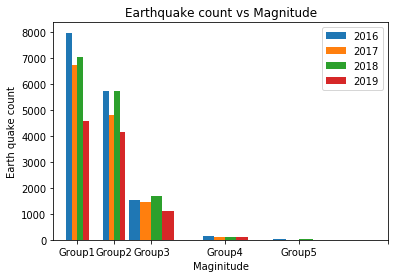

In [14]:
#Trying to plot the entire data in one Map

bins = 4,4.5,5,6,7,maxmag

plt.hist((df_year1['mag'],df_year2['mag'],df_year3['mag'],df_year4['mag']), bins, histtype='bar', align='left', rwidth=0.60)

plt.xticks(bins,('Group1','Group2','Group3','Group4','Group5'))
plt.xlabel('Maginitude')
plt.ylabel('Earth quake count')
plt.title("Earthquake count vs Magnitude")
plt.legend(('2016','2017','2018','2019'))
plt.show()


# 7) ​Find the 10 countries with the highest number of earthquakes (30 points)​ (Note: Yes, this is only countries, not full place)

In [15]:
newdf=final_df
newdf['place']=newdf['place'].str.split('of').str[-1]
newdf['place']=newdf['place'].str.split(',').str[-1]

newdf['place'].value_counts().head(10)


 Indonesia           6577
 Japan               3427
 Papua New Guinea    3091
 Fiji                2530
 New Zealand         2463
 Chile               2300
 Philippines         2087
 Alaska              1867
 Russia              1757
 Tonga               1644
Name: place, dtype: int64

# 8) ​Analyze the distribution of the Earthquake magnitudes. This is, make a histogram of the Earthquake count versus magnitude. Make sure to use a Logarithmic scale. What sort of relationship do you see? (20 points) P​ lease add labels and colors to the plot.

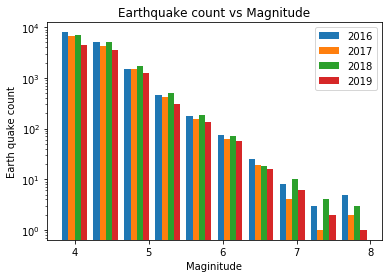

In [16]:
plt.hist(x=((df_year1['mag'],df_year2['mag'],df_year3['mag'],df_year4['mag'])), align='left', log=True)
plt.xlabel('Maginitude')
plt.ylabel('Earth quake count')
plt.title("Earthquake count vs Magnitude")
plt.legend(('2016','2017','2018','2019'))
plt.show()

## Observation - The bar graph here is a UniModal bar graph. It has 1 peak. This shows that there are more number of 4 magnitude earth quakes. And as the magnitude of earth quake increases the frequency of that earth quake reduces. Showing a inverse relationship between the magnitude and the frequency.

# 9) ​Analyze the distribution of the Earthquake depths. This is, make a histogram of the Earthquake count versus depth. Make sure to use a Logarithmic scale. What sort of relationship do you see? (20 points) ​Please add labels and colors to the plot.

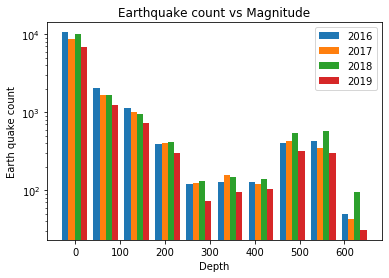

In [63]:
plt.hist(x=((df_year1['depth'],df_year2['depth'],df_year3['depth'],df_year4['depth'])), align='left',log=True)
plt.xlabel('Depth')
plt.ylabel('Earth quake count')
plt.title("Earthquake count vs Magnitude")
plt.legend(('2016','2017','2018','2019'))
plt.show()

## Observation - The bar graph here is a Bi Modal bar graph. Here we can observe that there are 2 peaks. The Highest Peak is observed for the lowest depth and then 2nd highest peak is observed at depth between 500-600. 

# 10) ​Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude. (20 points) ​Please add labels and colors to the plot.

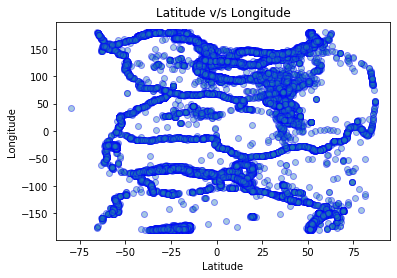

In [18]:
plt.scatter(x=final_df['latitude'],y=final_df['longitude'], alpha=0.4,edgecolors="blue")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("Latitude v/s Longitude")
plt.show()

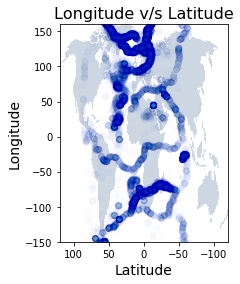

In [19]:
import matplotlib.image as mpimg
import matplotlib.image as mpimg
world_img=mpimg.imread('world.png')

plt.scatter(x=final_df['latitude'],y=final_df['longitude'], alpha=0.01,edgecolors="blue")
plt.imshow(world_img, cmap='viridis',extent=[120,-120,-150, 160], alpha=1)

plt.ylabel("Longitude", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.title("Longitude v/s Latitude",fontsize=16)
plt.show()

# 11) Using the US package (https://pypi.org/project/us/), clean the dataset you used previously to only have data from the USA .​ You need to create a function that accommodates this. (20 points)

In [20]:
import us


In [21]:
newdf=final_df   
#Taking only the last variable, i.e country from the place
newdf['place']=newdf['place'].str.split('of').str[-1]
newdf['place']=newdf['place'].str.split(',').str[-1]
newdf['place']=newdf['place'].str.lstrip()

#making a new dataframe that will store only the US data
US_df = pd.DataFrame(columns=['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'])
US_df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource


In [22]:
for index, row in newdf.iterrows(): 
    if((us.states.lookup(row['place']))!=None):
        US_df=US_df.append(row)

In [23]:
US_df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000,3845.000000
mean,38.016972,-9.253804,67.256802,4.424947,3.856437,111.670312,1.940215,0.748699,7.182018,4.966570,0.090793,53.702731
std,18.357715,151.605612,82.674586,0.409147,16.802386,67.026605,2.868585,0.285894,4.790868,4.004056,0.079297,77.582901
min,-15.493300,-179.996300,-0.930000,4.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000
25%,18.706300,-153.546100,10.000000,4.100000,0.000000,62.000000,0.279000,0.590000,4.100000,1.900000,0.041000,9.000000
50%,43.711700,-111.451600,29.190000,4.300000,0.000000,120.000000,1.175000,0.760000,7.200000,4.800000,0.075000,26.000000
75%,52.949200,145.500200,105.090000,4.600000,0.000000,161.000000,2.678000,0.930000,10.400000,7.600000,0.127000,63.000000
max,69.666200,179.980300,563.260000,7.900000,289.000000,331.000000,44.071000,2.110000,31.700000,32.800000,0.532000,684.000000


In [24]:
US_df.count()

time               3845
latitude           3845
longitude          3845
depth              3845
mag                3845
magType            3845
nst                3845
gap                3845
dmin               3845
rms                3845
net                3845
id                 3845
updated            3845
place              3845
type               3845
horizontalError    3845
depthError         3845
magError           3845
magNst             3845
status             3845
locationSource     3845
magSource          3845
dtype: int64

# 12) Using the cleaned US-only version of your dataset answer the following questions (30 points total):

Note: Question 12 has to be correct and match my own solutions, otherwise you will receive no marks for these responses.

# a) Find the top 10 US states where the strongest earthquakes occurred (10 points)


In [25]:
temp_df=US_df.nlargest(10, 'mag')
temp_df[['place','mag']]

,place,mag
42324,Alaska,7.9
7111,Northern Mariana Islands,7.7
14539,Alaska,7.1
29965,Alaska,7.1
38551,Hawaii,6.9
23245,Alaska,6.8
1342,California,6.6
18531,Alaska,6.5
34889,Alaska,6.5
34035,Northern Mariana Islands,6.4


# b) On a per-year basis, use a bar chart to plot the number of earthquakes for each of the following magnitude groups ranges: Group 1: [4,4.5), Group 2: [4.5,5), Group 3: [5,6), Group 4: [6,7), Group 5: (7,MAX]. Pay close attention to the group ranges. (10 points) Please add labels and colors to the plot.


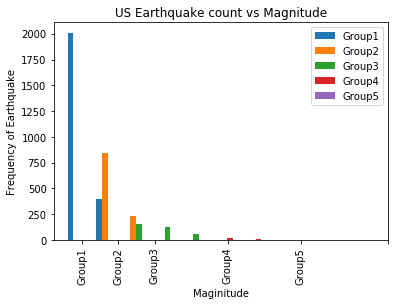

In [29]:
maxmag=US_df['mag'].max()

US_df_group1 = US_df[(US_df['mag']>=4) & (US_df['mag']<4.5)]
US_df_group2 = US_df[(US_df['mag']>=4.5) & (US_df['mag']<5)]
US_df_group3 = US_df[(US_df['mag']>=5) & (US_df['mag']<6)]
US_df_group4 = US_df[(US_df['mag']>=6) & (US_df['mag']<7)]
US_df_group5 = US_df[(US_df['mag']>7) & (US_df['mag']<=maxmag)]


plt.hist((US_df_group1['mag'],US_df_group2['mag'],US_df_group3['mag'],US_df_group4['mag'],US_df_group5['mag']), 
         bins=None, histtype='bar',align='left', rwidth=10)
plt.xticks(bins,('Group1','Group2','Group3','Group4','Group5'),rotation=90)
plt.xlabel('Maginitude')
plt.ylabel('Frequency of Earthquake')
plt.title("US Earthquake count vs Magnitude")
plt.legend(('Group1','Group2','Group3','Group4','Group5'))
plt.show()

c) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude. Overlay a US map on top of this plot to match the locations. (20 points) Please add labels and colors to the plot.

In [41]:
import matplotlib.image as mpimg
import matplotlib.image as mpimg
us_img=mpimg.imread('us map.png')

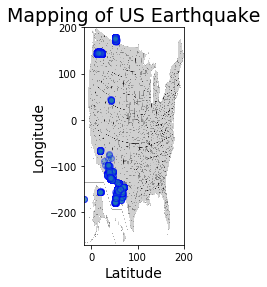

In [64]:
plt.scatter(x=US_df['latitude'],y=US_df['longitude'], alpha=0.4,edgecolors="blue")

plt.imshow(us_img, cmap='viridis',extent=[-16, 200, -270, 200], alpha=1)

plt.ylabel("Longitude", fontsize=14)
plt.xlabel("Latitude", fontsize=14)
plt.title("Mapping of US Earthquake",fontsize=19)
plt.show()
